# Example ? Positronium

Injected positrons ultimately cool to nonrelativistic energies, at which point they annihilate with ambient free electrons by first forming positronium and then annihilating. DarkHistory provides the positronium module [`electrons.positronium`](https://hongwanliu.github.io/DarkHistory/html/_autosummary/darkhistory/electrons/darkhistory.electrons.positronium.html) to obtain the resulting spectra from a positron at rest annihilating through the formation of positronium.

## Initialization

In [1]:
%load_ext autoreload
import sys
sys.path.append("..")

In [2]:
%matplotlib inline

In [3]:
%autoreload

import matplotlib
matplotlib.rc_file('matplotlibrc')
import matplotlib.pyplot as plt

import numpy as np
from darkhistory import physics as phys
from darkhistory.electrons import positronium as pos

## Positronium Spectrum

Positronium has two ground states: ortho-positronium or the triplet state, which decays to three photons, and para-positronium or the singlet state, which decays to two photons. The para-positronium decay spectrum is simply a line spectrum, while the ortho-positronium spectrum has been worked out to leading order in perturbation theory <cite data-cite="6232408/AVJQNP3G"></cite>. These spectra are computed by [`positronium.ortho_photon_spec`](https://hongwanliu.github.io/DarkHistory/html/_autosummary/darkhistory/electrons/positronium/darkhistory.electrons.positronium.ortho_photon_spec.html) and [`positronium.para_photon_spec`](https://hongwanliu.github.io/DarkHistory/html/_autosummary/darkhistory/electrons/positronium/darkhistory.electrons.positronium.para_photon_spec.html) respectively. 

If we assume that positrons form positronium and populate these two states according to their statistical weights, then we can also compute a weighted photon spectrum, which is done by [`positronium.weighted_photon_spec`](https://hongwanliu.github.io/DarkHistory/html/_autosummary/darkhistory/electrons/positronium/darkhistory.electrons.positronium.weighted_photon_spec.html). 

Let's get the spectrum for such decays, with some given energy abscissa provided.

In [13]:
eng = 10**np.arange(5, 6.1, 0.001)

ortho_spec    = pos.ortho_photon_spec(eng)
para_spec     = pos.para_photon_spec(eng)
weighted_spec = pos.weighted_photon_spec(eng)

And a plot of these spectra:

Text(0, 0.5, '$E \\, dN/dE$ [MeV]')

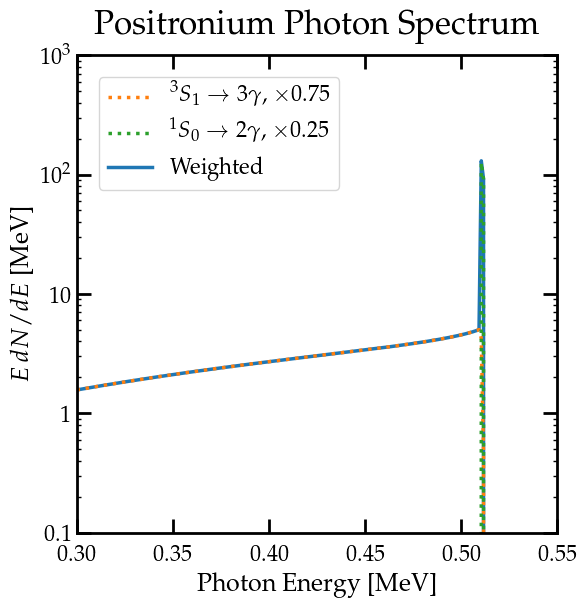

In [17]:
plt.figure()

weighted_plot, = plt.plot(eng/1e6, eng*weighted_spec.dNdE, label='Weighted')
ortho_plot, = plt.plot(eng/1e6, eng*ortho_spec.dNdE*0.75, ':', label=r'$^3 S_1 \to 3\gamma$, $\times 0.75$' )
para_plot,  = plt.plot(eng/1e6, eng*para_spec.dNdE*0.25, ':', label=r'$^1 S_0 \to 2\gamma$, $\times 0.25$')

plt.legend(handles=[ortho_plot, para_plot, weighted_plot])

ax = plt.gca()

ax.set_yscale('log')

plt.axis([0.3, 0.55, 1e-1, 1e3])

plt.title('Positronium Photon Spectrum')
plt.xlabel('Photon Energy [MeV]')
plt.ylabel(r'$E \, dN/dE$ [MeV]')






Let's check that the energy contained in each spectrum, as well as the number of photons produced makes sense. These spectra are normalized to one positronium annihilation each. 

In [18]:
print('Number of photons in ortho_spec (3 gammas): ', ortho_spec.totN())
print('Number of photons in para_spec (2 gammas): ' , para_spec.totN())
print('Number of photons in weighted_spec (3*(3/4) + 2*(1/4) = 2.75 gammas): ', weighted_spec.totN())

print('Total energy in ortho_spec: ', ortho_spec.totN())
print('Total energy in para_spec: ' , para_spec.totN())
print('Total energy in weighted_spec: ', weighted_spec.totN())
print('Positronium mass: ', 2*phys.me)


Number of photons in ortho_spec (3 gammas):  2.8872426029505442
Number of photons in para_spec (2 gammas):  2.0
Number of photons in weighted_spec (3*(3/4) + 2*(1/4) = 2.75 gammas):  2.6654319522129084
Total energy in ortho_spec:  2.8872426029505442
Total energy in para_spec:  2.0
Total energy in weighted_spec:  2.6654319522129084
Positronium mass:  1021997.8922


## Bibliography

<div class="cite2c-biblio"></div>